## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.577106  0.969972  0.917295  0.263100 -0.575713  0.124018
1  1.145073 -0.407354 -1.521501 -1.355407  0.049572  0.328030
2 -0.550944  1.375526 -1.488247 -0.022306  0.802612  1.335162
3  0.599596 -1.525046  0.753723 -0.809016 -0.383663 -1.521314
4 -1.579797  0.366074  0.571587 -0.564307  0.748667 -1.230994


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0013215	total: 46.6ms	remaining: 46.6s
1:	learn: 0.9920362	total: 47.1ms	remaining: 23.5s
2:	learn: 0.9815805	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9735747	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9641102	total: 48.4ms	remaining: 9.62s
5:	learn: 0.9522712	total: 48.7ms	remaining: 8.07s
6:	learn: 0.9422921	total: 49.1ms	remaining: 6.96s
7:	learn: 0.9320477	total: 49.4ms	remaining: 6.13s
8:	learn: 0.9236262	total: 49.8ms	remaining: 5.48s
9:	learn: 0.9147519	total: 50.2ms	remaining: 4.96s
10:	learn: 0.9070510	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8970027	total: 50.9ms	remaining: 4.19s
12:	learn: 0.8897992	total: 51.3ms	remaining: 3.9s
13:	learn: 0.8818103	total: 51.8ms	remaining: 3.65s
14:	learn: 0.8732206	total: 52.5ms	remaining: 3.45s
15:	learn: 0.8644546	total: 52.9ms	remaining: 3.25s
16:	learn: 0.8564728	total: 53.3ms	remaining: 3.08s
17:	learn: 0.8478671	total: 53.7ms	remaining: 2.93s
18:	learn: 0.8394189	total: 54ms	remaining: 2

195:	learn: 0.1969190	total: 119ms	remaining: 487ms
196:	learn: 0.1954720	total: 119ms	remaining: 486ms
197:	learn: 0.1940118	total: 120ms	remaining: 485ms
198:	learn: 0.1926577	total: 120ms	remaining: 483ms
199:	learn: 0.1913529	total: 120ms	remaining: 481ms
200:	learn: 0.1897728	total: 121ms	remaining: 480ms
201:	learn: 0.1883318	total: 121ms	remaining: 478ms
202:	learn: 0.1865607	total: 121ms	remaining: 477ms
203:	learn: 0.1851457	total: 122ms	remaining: 475ms
204:	learn: 0.1836530	total: 122ms	remaining: 473ms
205:	learn: 0.1818988	total: 122ms	remaining: 472ms
206:	learn: 0.1804839	total: 123ms	remaining: 470ms
207:	learn: 0.1794425	total: 123ms	remaining: 469ms
208:	learn: 0.1782875	total: 123ms	remaining: 467ms
209:	learn: 0.1772195	total: 124ms	remaining: 466ms
210:	learn: 0.1758260	total: 124ms	remaining: 464ms
211:	learn: 0.1744886	total: 124ms	remaining: 463ms
212:	learn: 0.1730079	total: 125ms	remaining: 461ms
213:	learn: 0.1716712	total: 125ms	remaining: 460ms
214:	learn: 

474:	learn: 0.0372974	total: 219ms	remaining: 242ms
475:	learn: 0.0371036	total: 219ms	remaining: 242ms
476:	learn: 0.0369221	total: 220ms	remaining: 241ms
477:	learn: 0.0367463	total: 220ms	remaining: 241ms
478:	learn: 0.0365366	total: 221ms	remaining: 240ms
479:	learn: 0.0363876	total: 221ms	remaining: 239ms
480:	learn: 0.0361863	total: 221ms	remaining: 239ms
481:	learn: 0.0360759	total: 222ms	remaining: 238ms
482:	learn: 0.0358498	total: 222ms	remaining: 238ms
483:	learn: 0.0356633	total: 222ms	remaining: 237ms
484:	learn: 0.0354967	total: 223ms	remaining: 237ms
485:	learn: 0.0352659	total: 223ms	remaining: 236ms
486:	learn: 0.0350472	total: 224ms	remaining: 236ms
487:	learn: 0.0348796	total: 224ms	remaining: 235ms
488:	learn: 0.0347372	total: 224ms	remaining: 234ms
489:	learn: 0.0345800	total: 225ms	remaining: 234ms
490:	learn: 0.0344424	total: 225ms	remaining: 233ms
491:	learn: 0.0342698	total: 225ms	remaining: 233ms
492:	learn: 0.0340979	total: 226ms	remaining: 232ms
493:	learn: 

760:	learn: 0.0092873	total: 323ms	remaining: 102ms
761:	learn: 0.0092343	total: 324ms	remaining: 101ms
762:	learn: 0.0091999	total: 324ms	remaining: 101ms
763:	learn: 0.0091619	total: 324ms	remaining: 100ms
764:	learn: 0.0091065	total: 325ms	remaining: 99.8ms
765:	learn: 0.0090679	total: 325ms	remaining: 99.3ms
766:	learn: 0.0090348	total: 326ms	remaining: 98.9ms
767:	learn: 0.0089754	total: 326ms	remaining: 98.5ms
768:	learn: 0.0089424	total: 326ms	remaining: 98ms
769:	learn: 0.0088919	total: 327ms	remaining: 97.6ms
770:	learn: 0.0088475	total: 327ms	remaining: 97.1ms
771:	learn: 0.0087932	total: 327ms	remaining: 96.7ms
772:	learn: 0.0087564	total: 328ms	remaining: 96.2ms
773:	learn: 0.0087089	total: 328ms	remaining: 95.8ms
774:	learn: 0.0086523	total: 328ms	remaining: 95.4ms
775:	learn: 0.0086308	total: 329ms	remaining: 94.9ms
776:	learn: 0.0085754	total: 329ms	remaining: 94.5ms
777:	learn: 0.0085429	total: 330ms	remaining: 94ms
778:	learn: 0.0084970	total: 330ms	remaining: 93.6ms
7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

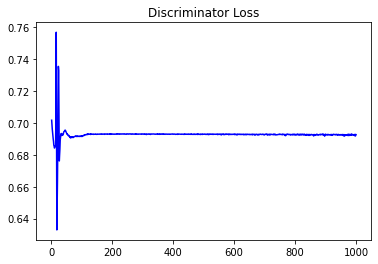

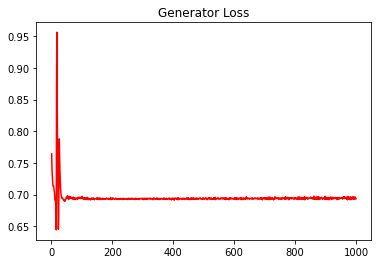

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05159159647653914


#### Sanity Checks 

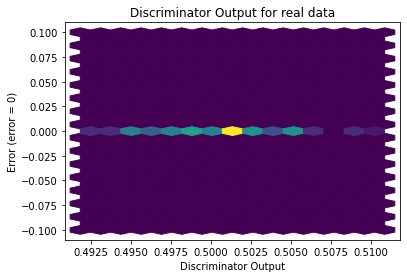

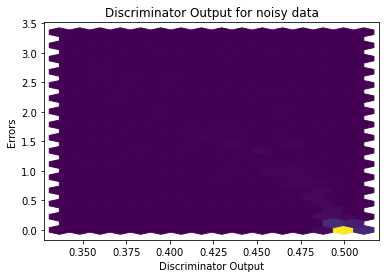

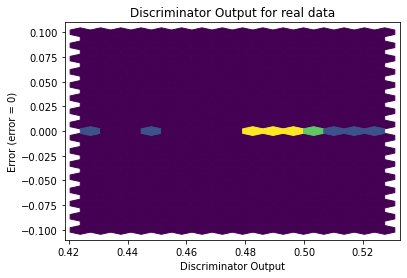

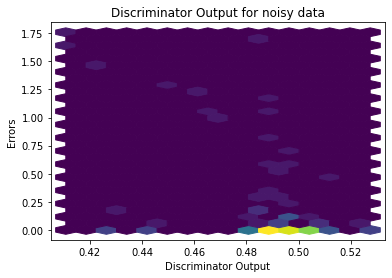

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


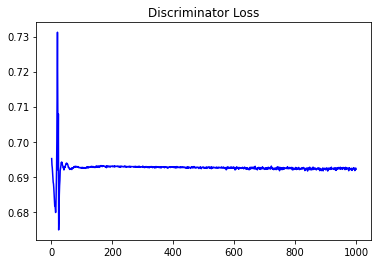

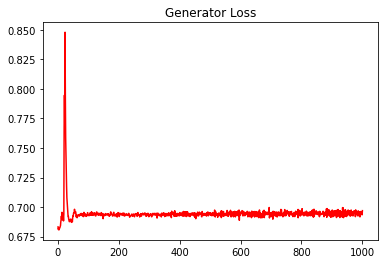

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.045278582926212375


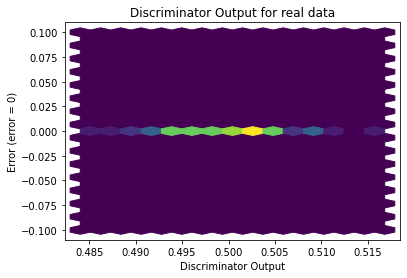

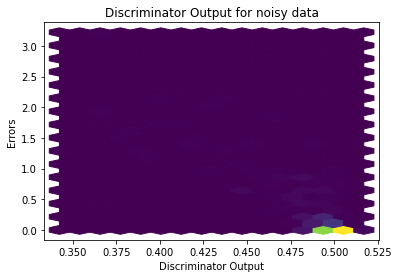

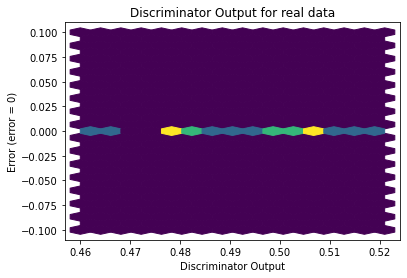

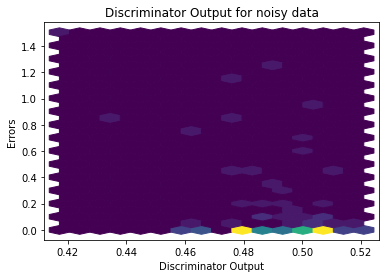

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5517]], device='cuda:0', requires_grad=True)
